<h1>Анализ данных сервиса аренды самокатов</h1>

Задачт проанализировать данные и проверите некоторые гипотезы, которые могут помочь бизнесу вырасти.


Чтобы совершать поездки по городу, пользователи сервиса пользуются мобильным приложением. Сервисом можно пользоваться:

- без подписки
- абонентская плата отсутствует;
- стоимость одной минуты поездки — 8 рублей;
- стоимость старта (начала поездки) — 50 рублей;
- с подпиской Ultra
- абонентская плата — 199 рублей в месяц;
- стоимость одной минуты поездки — 6 рублей;
- стоимость старта — бесплатно.


#### Описание данных

##### Пользователи — users_go.csv

user_id — уникальный идентификатор пользователя
name — имя пользователя
age — возраст
city — город
subscription_type — тип подписки (free, ultra)

##### Поeздки — rides_go.csv

user_id — уникальный идентификатор пользователя
distance — расстояние, которое пользователь проехал в текущей сессии (в метрах)
duration — продолжительность сессии (в минутах) — время с того момента, как пользователь нажал кнопку «Начать поездку» до момента, как он нажал кнопку «Завершить поездку»
date — дата совершения поездки

##### Подписки — subscriptions_go.csv

subscription_type — тип подписки
minute_price — стоимость одной минуты поездки по данной подписке
start_ride_price — стоимость начала поездки
subscription_fee — стоимость ежемесячного платежа

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st

#### Загрузка данных


In [4]:
users_df=pd.read_csv('users_go.csv')
riders_df=pd.read_csv('rides_go.csv')
subscriptions_df=pd.read_csv('subscriptions_go.csv')

In [5]:
display(users_df.head())

,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra


In [6]:
users_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB


In [7]:
riders_df.head()

,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28


In [8]:
riders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 564.8+ KB


In [9]:
subscriptions_df.head()

,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


In [10]:
subscriptions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      int64 
 2   start_ride_price   2 non-null      int64 
 3   subscription_fee   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 192.0+ bytes


##### Вывод

Некоторые столбцы содержат дату как Object. Наименования столбцов корректные. 

#### Предобработка данных


In [11]:
# приводим колонку date в таблице riders_df к datetime
riders_df['date'] = pd.to_datetime(riders_df['date'],format = '%Y-%m-%d')

In [12]:
# создаю новый столбец
riders_df['ride_month'] =pd.DatetimeIndex(riders_df['date']).month 
print(riders_df.head(5) )
riders_df.info()

   user_id     distance   duration       date  ride_month
0        1  4409.919140  25.599769 2021-01-01           1
1        1  2617.592153  15.816871 2021-01-18           1
2        1   754.159807   6.232113 2021-04-20           4
3        1  2694.783254  18.511000 2021-08-11           8
4        1  4028.687306  26.265803 2021-08-28           8
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     18068 non-null  int64         
 1   distance    18068 non-null  float64       
 2   duration    18068 non-null  float64       
 3   date        18068 non-null  datetime64[ns]
 4   ride_month  18068 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(2)
memory usage: 705.9 KB


In [13]:
# Проверяею пропущенные значения и дубликаты. Обрабатываю их
print(users_df.isna().sum()) 
print(riders_df.isna().sum()) 
print(subscriptions_df.isna().sum()) 
print('\n Дубликаты:')
print('users_df', users_df.duplicated().sum())
print('rides_df', riders_df.duplicated().sum()) 
print('subscriptions_df', subscriptions_df.duplicated().sum()) 
users_df = users_df.drop_duplicates().reset_index(drop=True) 

#users_df

user_id              0
name                 0
age                  0
city                 0
subscription_type    0
dtype: int64
user_id       0
distance      0
duration      0
date          0
ride_month    0
dtype: int64
subscription_type    0
minute_price         0
start_ride_price     0
subscription_fee     0
dtype: int64

 Дубликаты:
users_df 31
rides_df 0
subscriptions_df 0


#### Вывод:

Все данные загружены, типы столбцов преобразованы. Проверено наличие пропущенных значений. Удалены 31 дубликаты

#### Исследовательский анализ данных


<AxesSubplot:title={'center':'К-во пользователей по городам'}, xlabel='Город', ylabel='К-во'>

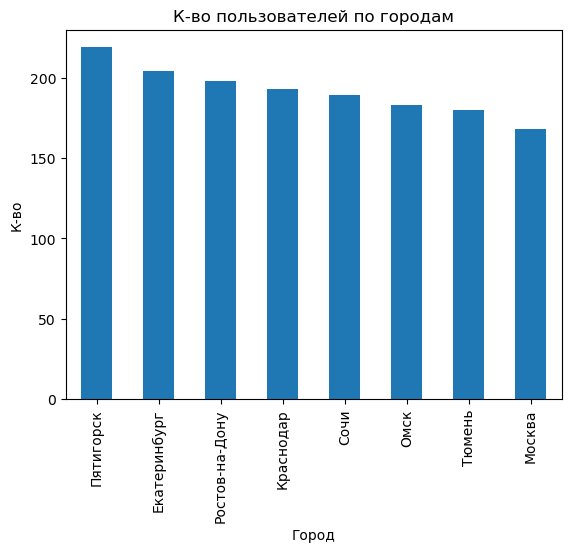

In [14]:
# частота встречаемости городов
users_df['city'].value_counts().plot(kind='bar', title="К-во пользователей по городам",xlabel="Город", ylabel="К-во")

<AxesSubplot:title={'center':'Cоотношение пользователей, %'}>

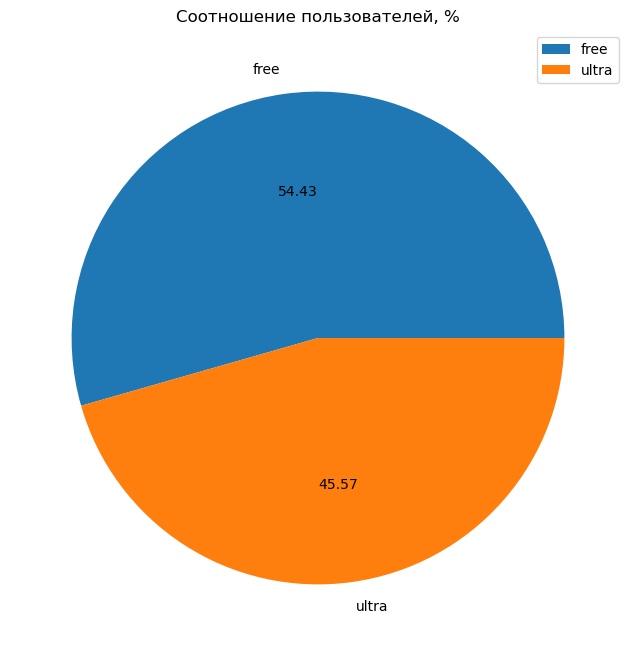

In [15]:
# соотношение пользователей с подпиской и без подписки
ratio_table=users_df.pivot_table(index=['subscription_type'], values='name', aggfunc='count')
#users_number=users_df['subscription_type'].count()

ratio_table.plot(kind='pie',title ="Cоотношение пользователей, %", y='name',ylabel="",autopct='%.2f',figsize=(8, 8))

Среднее значение возраста  24.903520208604956
Медианное значение возраста 25.0


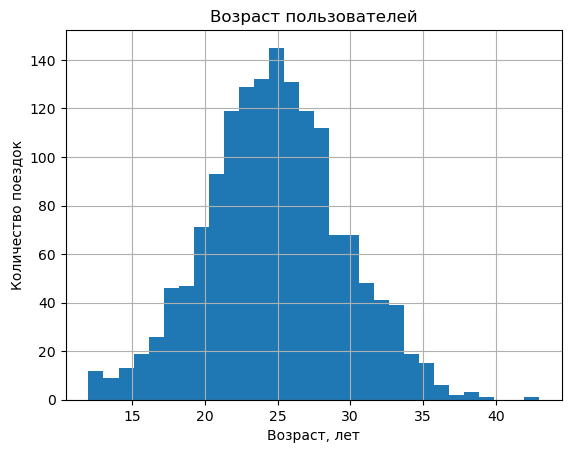

In [16]:
# возраст пользователей
plt.title("Возраст пользователей")
plt.xlabel('Возраст, лет')
plt.ylabel('Количество поездок')

users_df['age'].hist(bins=30)


print('Среднее значение возраста ',  users_df['age'].mean())
print('Медианное значение возраста', users_df['age'].median())

Среднее значение поездки  3070.6599756818705
Медианное значение поездки  3133.6099936787664


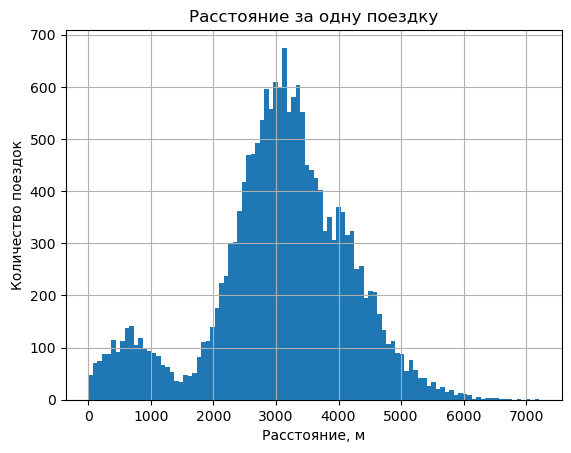

In [17]:
# расстояние, которое пользователь преодолел за одну поездку
user_rider=users_df.merge(riders_df, on = 'user_id', how = 'left')
plt.xlabel('Расстояние, м')
plt.ylabel('Количество поездок')
plt.title("Расстояние за одну поездку")
user_rider['distance'].hist(bins=100)

print('Среднее значение поездки ',  user_rider['distance'].mean())
print('Медианное значение поездки ', user_rider['distance'].median())

Среднее значение поездки  17.805011197984363
Медианное значение поездки  17.678394530393803


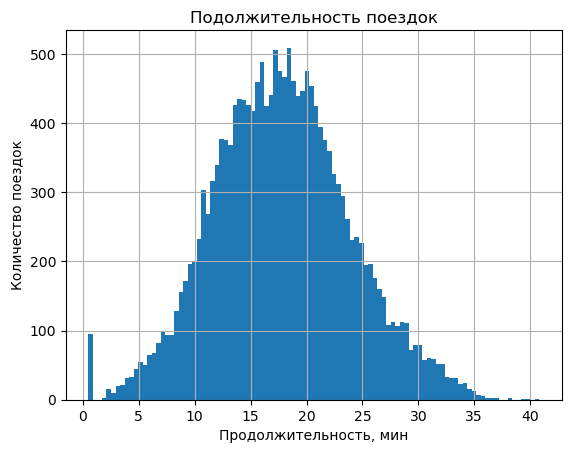

In [18]:
# продолжительность поездок
user_rider['duration'].hist(bins=100)
plt.title("Подолжительность поездок")
plt.xlabel('Продолжительность, мин')
plt.ylabel('Количество поездок')

print('Среднее значение поездки ',  user_rider['duration'].mean())
print('Медианное значение поездки ', user_rider['duration'].median())

#### Вывод 3:
    
Наименьшее количество пользователй в Москве.

54% пользователей - без подписки (free).

Распределение возрастов - нормальное. Пик на графике практически совпадает с медианой - 25 лет.

Дистанции, которые пользователь преодолел за 1 поездку, имеют 2 максимума -в малом и среднем диапазоне (видимо, слишком разные по масштабам города попали в исследование). Медиана 3070 м на графике практически совпадает с пиком в среднем диапазоне.

Продолжительность поездок имеет всплеск (выброс) около 0 минут, видимо, связанный с техническими неисправностями самоката СРАЗУ при начале движения. Медиана (17 минут) на графике практически совпадает с пиком в среднем диапазоне

#### Объединение данных


In [19]:
# объединим данные в один датафрейм
full_data = users_df.merge(riders_df, on='user_id').merge(subscriptions_df, on='subscription_type')
full_data

,user_id,name,age,city,subscription_type,distance,duration,date,ride_month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.919140,25.599769,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.592153,15.816871,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.159807,6.232113,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.783254,18.511000,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.687306,26.265803,2021-08-28,8,6,0,199
...,...,...,...,...,...,...,...,...,...,...,...,...
18063,1534,Альберт,25,Краснодар,free,3781.098080,19.822962,2021-11-04,11,8,50,0
18064,1534,Альберт,25,Краснодар,free,2840.423057,21.409799,2021-11-16,11,8,50,0
18065,1534,Альберт,25,Краснодар,free,3826.185507,18.435051,2021-11-18,11,8,50,0
18066,1534,Альберт,25,Краснодар,free,2902.308661,16.674362,2021-11-27,11,8,50,0


In [20]:
# данные о пользователях без подписки
free_sub = full_data.query("`subscription_type` == 'free'")

# Данные о пользователях с подпиской
ultra_sub = full_data.query("`subscription_type` == 'ultra'")

Визуализируем информацию о расстоянии на бесплатном тарифе

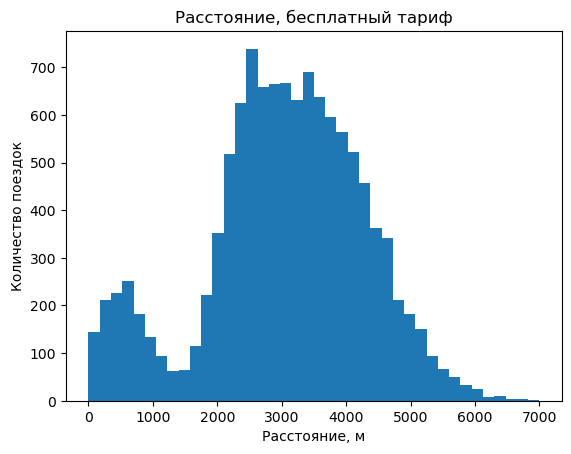

<Figure size 2000x2000 with 0 Axes>

In [21]:
plt.hist(free_sub['distance'], bins=40, range = (0, 7000))
plt.title('Расстояние, бесплатный тариф')
plt.xlabel('Расстояние, м')
plt.ylabel('Количество поездок')
plt.figure(figsize=(20,20))
plt.show()

Визуализируем информацию о расстоянии на платном тарифе

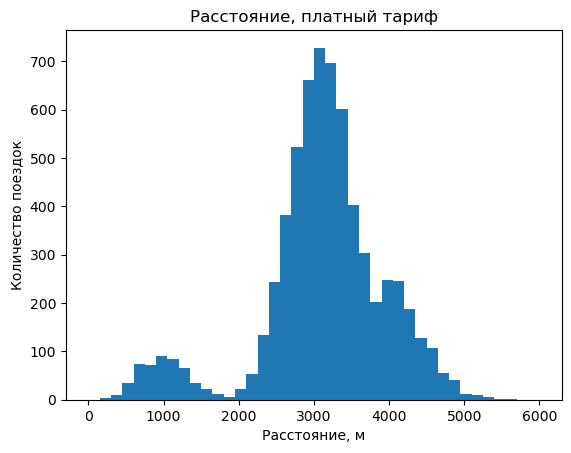

<Figure size 2000x2000 with 0 Axes>

In [22]:
plt.hist(ultra_sub['distance'], bins=40, range = (0, 6000))
plt.title('Расстояние, платный тариф')
plt.xlabel('Расстояние, м')
plt.ylabel('Количество поездок')
plt.figure(figsize=(20,20))
plt.show()

Визуализируем информацию о времени на бесплатном тарифе

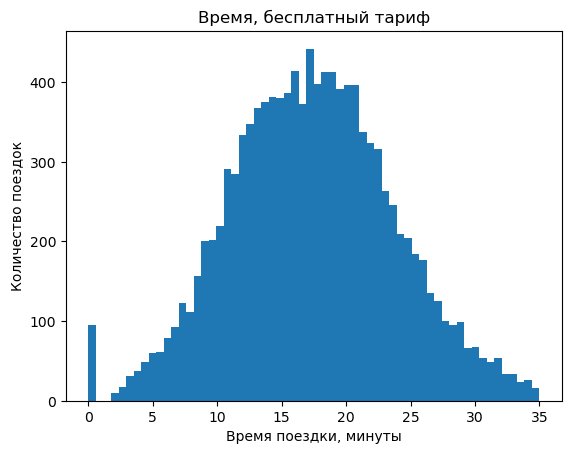

<Figure size 2000x2000 with 0 Axes>

In [23]:
plt.hist(free_sub['duration'], bins=60, range = (0, 35))
plt.title('Время, бесплатный тариф')
plt.xlabel('Время поездки, минуты')
plt.ylabel('Количество поездок')
plt.figure(figsize=(20,20))
plt.show()

Визуализируем информацию о времени на платном тарифе

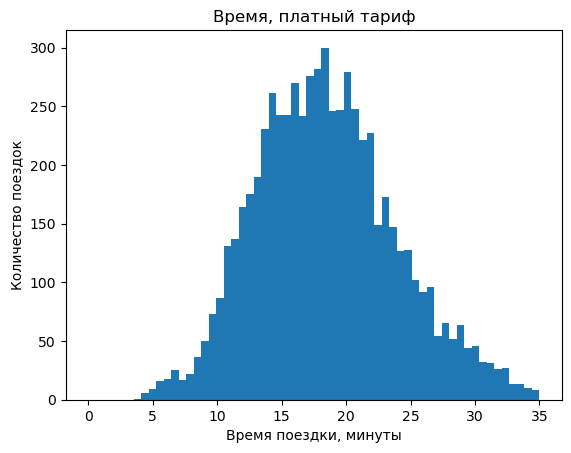

<Figure size 2000x2000 with 0 Axes>

In [24]:
plt.hist(ultra_sub['duration'], bins=60, range = (0, 35))
plt.title('Время, платный тариф')
plt.xlabel('Время поездки, минуты')
plt.ylabel('Количество поездок')
plt.figure(figsize=(20,20))
plt.show()

##### Вывод

Объединили данные о пользователях, поездках и тарифах в один датафрейм - full_data.

Выделили два датафрейма на основе full_data:

free_sub - Информация о пользователях с бесплатным тарифом
ultra_sub - Информация о пользователях с платным тарифом
Визуализировали информацию о расстоянии и времени для каждого из тарифов.

Для бесплатного тарифа время поездки составляет от 10 до 30 минут, и проезжают от 2 до 5 км, есть пользователи, которые проехали даже 6, 6.5 км.

Платный тариф. В основном время укладывается в промежуток от 15 до 25 минут. Пик расстояния приходится на 3км.

Таким образом, можно сделать вывод, что пользователи с бесплатным тарифом в целом совершают более долгие поездки, а также проезжают большее расстояние, чем пользователи на платном тарифе.

####  Подсчёт выручки


In [25]:
# Найдем суммарное расстояние, количество поeздок и суммарное время для каждого пользователя за каждый месяц

full_data['duration'] = np.ceil(full_data['duration']).astype('int64')

total_data = pd.pivot_table(full_data,
                           index=['ride_month', 'user_id'],
                           values = ['distance', 'duration', 'name', 'subscription_type'],
                           aggfunc = {'distance': sum, 
                                      'duration' : sum, 
                                      'name' : len, 
                                      'subscription_type' : min})

total_data.rename(columns = {'name' : 'count_tips'}, inplace = True)
total_data.sort_values(by='ride_month').head(20)

distance  duration  count_tips subscription_type
ride_month user_id                                                      
1          1         7027.511294        42           2             ultra
           1061     12637.249630        43           3              free
           1063      3276.362299        10           1              free
           1064      5297.324649        15           1              free
           1065     14547.099333        99           4              free
           1066      2809.064949        19           1              free
           1067      3864.900780        22           1              free
           1069      7007.076943        53           3              free
           1071      3635.094136        15           1              free
           1072      2498.615999        11           1              free
           1073      2945.802455        16           1              free
           1074      2814.793386        22           1              free
           1075      5746.745124        29           3              free
           1077       114.036199        13           1              free
           1078      3748.219563        19           1              free
           1082      7250.124895        30           2              free
           1083      5848.881463        31           2              free
           1084      4615.097141        25           1              free
           1085     11410.546346        63           3              free
           1086      4044.280322        18           1              free

In [26]:
# Помесячная выручка считается по формуле: 
#(стоимость старта поездки × количество поездок) + стоимость одной минуты поездки × общая продолжительность всех 
# поездок в минутах) + стоимость подписки.

target_columns=['user_id','start_ride_price', 'minute_price', 'subscription_fee']
total_data=total_data.merge(full_data[target_columns], on='user_id')
total_data['revenue_per_month']=total_data['start_ride_price']*total_data['count_tips']+total_data['minute_price']*total_data['duration']+total_data['subscription_fee']
total_data=total_data.drop(columns=target_columns)
total_data=total_data.drop_duplicates().reset_index(drop=True) #Убираем дубликаты
total_data

,distance,duration,count_tips,subscription_type,revenue_per_month
0,7027.511294,42,2,ultra,451
1,754.159807,7,1,ultra,241
2,6723.470560,46,2,ultra,475
3,5809.911100,32,2,ultra,391
4,7003.499363,56,3,ultra,535
...,...,...,...,...,...
11326,6622.770298,39,2,free,412
11327,6308.833718,40,2,free,420
11328,1159.944751,13,1,ultra,277
11329,8885.157780,73,3,ultra,637


#### Вывод

Создали новый датафрейм с агрегированными данными (total_data) на основе датафрейма с объединенными данными (full_data).

Нашли суммарное расстояние, количество поездок и суммарное время для каждого пользователя за каждый месяц. Также добавили столбец с помесячной выручкой, которую принес каждый пользователь.

#### Проверка гипотез

6.1 Проверим гипотезу: пользователи с подпиской тратят больше времени на поездки, чем пользователи на бесплатном тарифе.

H_0: Время (duration) пользователей на подписке ultra = время (duration) пользователей на подписке free

H_1: Время (duration) пользователей на подписке ultra > время (duration) пользователей на подписке free

alpha = 0.05

In [27]:
ultra = ultra_sub['duration'] 

free = free_sub['duration']

results = st.ttest_ind(ultra, 
                       free,
                       alternative = 'greater')

alpha = 0.05

print(results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не удалось отвергнуть нулевую гипотезу')

1.2804098316645618e-34
Отвергаем нулевую гипотезу


#### Вывод

Пользователи с подпиской тратят БОЛЬШЕ времени на поездки.

6.2

Расстояние одной поездки в 3130 метров — оптимальное с точки зрения износа самоката. Можно ли сказать, что расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров? Проверьте гипотезу и сделайте выводы.

Проверим гипотезу: пользователи с подпиской проезжают расстояние, не превышающее 3130 метров за одну поездку.

H_0: Расстояние (distance) пользователей на подписке ultra = 3130 метров

H_1: Расстояние (distance) пользователей на подписке ultra > 3130 метров

alpha = 0.05

In [28]:
ultra_dist = ultra_sub['distance']

interested_value = 3130.0

alpha = 0.05

results = st.ttest_1samp(
    ultra_dist, 
    interested_value,
    alternative='greater')
    
print(results.pvalue)

if (results.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не удалось отвергнуть нулевую гипотезу')

0.9195368847849785
Не удалось отвергнуть нулевую гипотезу


#### Вывод

Нет оснований считать, что пользователи с подпиской проезжают более 3130 м

6.3

Проверьте гипотезу о том, будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки. Сделайте вывод.

Проверим гипотезу: помесячная выручка от пользователей с подпиской выше, чем выручка от пользователей без подписки

H_0: Выручка (revenue_per_month) пользователей на подписке ultra = выручка (revenue_per_month) пользователей на подписке free

H_1: Выручка (revenue_per_month) пользователей на подписке ultra > выручка (revenue_per_month) пользователей на подписке free

alpha = 0.05

In [29]:
ultra_per_mnth = total_data.loc[total_data.subscription_type == 'ultra', 'revenue_per_month'] 

free_per_mnth = total_data.loc[total_data.subscription_type == 'free', 'revenue_per_month'] 


results = st.ttest_ind(ultra_per_mnth, 
                       free_per_mnth,
                       alternative = 'greater')

alpha = .05

print(results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не удалось отвергнуть нулевую гипотезу')

1.8850394384715216e-31
Отвергаем нулевую гипотезу


#### Вывод

Действительно можем утверждать, что выручка с пользователей на подписке ultra превышает выручку с пользователей на подписке free

6.4

Представьте такую ситуацию: техническая команда сервиса обновила сервера, с которыми взаимодействует мобильное приложение. Она надеется, что из-за этого количество обращений в техподдержку значимо снизилось. Некоторый файл содержит для каждого пользователя данные о количестве обращений до обновления и после него. Какой тест вам понадобился бы для проверки этой гипотезы?

Ответ:

Будем использовать гипотезу о равенстве средних для зависимых (парных) выборок.

Гипотезы будут сформулированы так:

H0 : μ1 = μ2
H1 : μ1 > μ2
где μ1 и μ2 - средние значения количество обращений в техподдержку до и после изменения.

Метод, который нужно использовать при сравнении: scipy.stats.ttest_rel()

#### Общий вывод

Загрузили 3 датафрейма: с пользователями, информацией о поездках, информацией о подписках.

Проверил данные на пропуски. Поменял тип данных у столбца date из датафрейма data_riders к типу даты. Также добавили столбец ride_month с номером месяца. Удалил дубликаты строк из датафрейма с пользователями.


Провел исследовательский анализ данных:

Оказалось, что количество пользователей по городам распределено примерно одинаково, нет выдающихся значений. Лидером по количеству пользователей является Пятигорск - 219 пользователей. Меньше всего пользователей в Москве - 168.

Пользователей, использующих бесплатную подписку больше - 835 человек, что является ~54% от общего числа пользователей. На платной подписке сидит 699 пользователей, что соответственно является ~46%.

Возраст пользователей укладывается в промежуток от 20 до 30 лет

В основном пользователи проезжают от 2.5 км до 4 км.

Чаще всего длительность поездки состовляет 13 - 22 минут

Объединил данные о пользователях, поездках и подписках в один датафрейм. На основе объединенного датафрейма создал еще 2 датафрейма:

Для пользователей с ultra подпиской
Для пользователей с free подпиской
Дальше визуализировал информацию о расстоянии и времени поездки для пользоватей каждого тарифа.

Для бесплатного тарифа время поездки составляет от 10 до 30 минут, и проезжают от 2 до 5 км, есть пользователи, которые проехали даже 6, 6.5 км.
Платный тариф. В основном время укладывается в промежуток от 15 до 25 минут. 
Пик расстояния приходится на 3км.
Нашел суммарное расстояние, количество поездок и суммарное время для каждого пользователя за каждый месяц - вывел все данные в отдельный датафрейм total_data. Добавил в датафрейм total_data столбец с помесячной выручкой revenue_per_month.

Проверил гипотезы:

Пользователи с подпиской тратят больше времени на поездки, чем пользователи на бесплатном тарифе
Отверг нулевую гипотезу

Пользователи с подпиской проезжают расстояние, не превышающее 3130 метров за одну поездку
Не удалось отвергнуть нулевую гипотезу

Помесячная выручка от пользователей с подпиской выше, чем выручка от пользователей без подписки
Отверг нулевую гипотезу
